In [1]:
import numpy as np

In [2]:
def sigmoid(x) :
    return 1/(1+np.exp(-x))

In [3]:
def softmax(x) :
    c = np.max(x, axis=1).reshape(-1,1)
    x = x-c
    return np.exp(x)/np.sum(np.exp(x), axis=1).reshape(-1,1)

In [5]:
X = np.random.randn(100000,10000)
l1 = np.random.randn(10000,1024)
a1 = sigmoid
l2 = np.random.randn(1024,10)
a2 = softmax

In [8]:
%%time
pred = a2(np.dot(a1(np.dot(X,l1)),12))

MemoryError: Unable to allocate 781. MiB for an array with shape (100000, 1024) and data type float64

In [7]:
((10000*1024 + 1024*10)*67)/(60*60*24*365)

21.777209538305428

In [6]:
x= np.linspace(-10,10,100)

In [4]:
import matplotlib.pyplot as plt

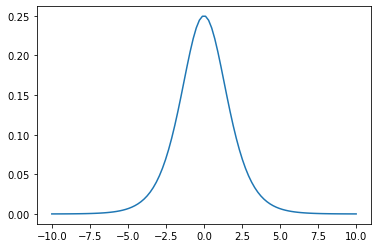

In [7]:
plt.plot(x,sigmoid(x)*(1-sigmoid(x)))

In [39]:
class AddNode:
    def __init__(self):
        pass
    
    def forward(self,x,y):
        self.x = x
        self.y = y
        out = self.x + self.y
        return out
    def backward(self, dout) :
        dx = dout*1
        dy = dout*1
        return dx, dy
    
class MulNode:
    def __init__(self) :
        self.x = None
        self.y = None
        
    def forward(self,x,y):
        self.x = x
        self.y = y
        out = self.x*self.y
        return out
    
    def backward(self,dout) :
        dx = self.y*dout
        dy = self.x*dout
        return dx, dy
        

In [40]:
apple_price = 100
apple_num = 2
banana_price = 300
banana_num = 5

tax = 1.1

# apple_buy = MulNode(apple_price, apple_num)
# banana_buy = MulNode(banana_price, banana_num)

In [14]:
apple_buy_result = apple_buy.forward(apple_price,apple_num)

In [15]:
banana_buy_result = banana_buy.forward(banana_price,banana_num)

In [17]:
apple_total = MulNode(apple_buy_result,tax)

In [18]:
apple_total_price = apple_total.forward(apple_buy_result,tax)

In [20]:
banana_total = MulNode(banana_buy_result,tax)

In [21]:
banana_total_price = banana_total.forward(banana_buy_result,tax)

In [22]:
total_price = AddNode()

In [23]:
total_price_result = total_price.forward(apple_total_price,banana_total_price)


In [24]:
total_price_result

1870.0000000000002

In [25]:
total_price.backward(total_price_result)

(1870.0000000000002, 1870.0000000000002)

In [26]:
print(banana_total_price)
print(apple_total_price)

1650.0000000000002
220.00000000000003


In [41]:
mul_apple_layer = MulNode()
mul_banana_layer = MulNode()




In [42]:
apple_price = mul_apple_layer.forward(apple_price, apple_num)
banana_price = mul_banana_layer.forward(banana_price, banana_num)



In [43]:
apple_total_price = mul_apple_layer.forward(apple_price,tax)
banana_total_price = mul_banana_layer.forward(banana_price,tax)


In [44]:
dout = 1

mul_apple_layer.backward(dout)

(1.1, 200)

In [67]:
apple = 100
apple_num = 2
banana = 300
banana_num = 5

tax = 1.1

In [47]:
mul_apple_layer = MulNode()
mul_apple_tax_layer = MulNode()

In [48]:
apple_price = mul_apple_layer.forward(apple_price,apple_num)

In [49]:
apple_total_price = mul_apple_tax_layer.forward(apple_price,tax)

In [50]:
apple_total_price

220.00000000000003

In [51]:
dout = 1
dapple, dtax = mul_apple_tax_layer.backward(dout)


In [52]:
print(dapple)
print(dtax)

1.1
200


In [53]:
mul_banana_layer = MulNode()
mul_banana_tax_layer = MulNode()

In [57]:
banana_price = mul_banana_layer.forward(banana_price,banana_num)
banana_total_price = mul_banana_tax_layer.forward(banana_price,tax)

In [58]:
dbanana, dtax = mul_banana_tax_layer.backward(1)

In [60]:
total_layer = AddNode()

In [62]:
total_layer.forward(apple_total_price,banana_total_price)

1870.0000000000002

In [63]:
total_layer.backward(dout = 1)

(1, 1)

In [64]:
total_layer.forward(apple_total_price, banana_total_price)

1870.0000000000002

In [66]:
mul_apple_layer = MulNode()
mul_banana_layer = MulNode()
add_apple_banana_Layer = AddNode()
mul_tax_layer = MulNode()


In [72]:
apple_price = mul_apple_layer.forward(apple,apple_num)
banana_price = mul_banana_layer.forward(banana,banana_num)


In [73]:
all_price = add_apple_banana_Layer.forward(apple_price, banana_price)

In [74]:
total_price = mul_tax_layer.forward(all_price, tax)

In [75]:
print(f'apple_price = {apple_price}')
print(f'banana_price = {banana_price}')
print(f'all_price = {all_price}')
print(f'total_price = {total_price}')

apple_price = 200
banana_price = 1500
all_price = 1700
total_price = 1870.0000000000002


In [76]:
dout = 1
dall_price, dtax = mul_tax_layer.backward(dout)

In [78]:
dapple

NameError: name 'dapple' is not defined

In [96]:
x = np.array([[-1,0],[1,2],[2,0]])
x

array([[-1,  0],
       [ 1,  2],
       [ 2,  0]])

In [97]:
x[x <= 0] = 0

In [98]:
from tkinter import W


class Relu :
    def __init__(self):
        self.mask = None
    def forward(self,x) :
        self.mask = x (x <=0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    def backward(self,dout) :
        dout[self.mask] = 0
        dx = dout
        return dx
    
class Sigmoid:
    def __init__(self):
        self.out = None
    def forward(self,x) :
        out = sigmoid(x)
        self.out = out
        return out
    def backward(self,dout) :
        dx = ((1-self.out)*self.out)*dout
        return dx
    
class Affine :
    def __init__(self):
        self.W = W
        self.b =b
        self.x = None
        self
        self.x = x
        
        
    def forward(self,x):
        pass
    def backward(self,dout):
        dx = np.dot(dout,self.W.T)
        self.dW = np.dot(self.x.T,dout)
        self.db = np.sum(dout,axis=0)
        dx = dx.reshape(self.origin_shape)
        return dx

In [84]:
xx = Sigmoid()

In [85]:
a = xx.forward(np.random.randn(2,3))
a

array([[0.62655084, 0.59751274, 0.73091223],
       [0.6597004 , 0.14976821, 0.36395071]])

In [100]:
relu_d = Relu()
relu_d.backward()

TypeError: backward() missing 1 required positional argument: 'dout'

In [ ]:
y = np.array([[7,6], [-2,5], [4,w])